In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt

import cv2

import joblib
import os
import glob
from tqdm import notebook

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [2]:
## specify the inpath, should be the same as outpath in create_egoaligned_blob_videos_v2.ipynb
inpath = '/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/data2share/temp_movies/'
action_types = ['attack', 'investigation', 'mount', 'other', 'Subinvestigate Group 3', 'Subinvestigate Group 6']
#plot params
dpi = 600

In [3]:
save = False
frame_list = {}
for selected_behavior in action_types:
    files = glob.glob(str.join('', (os.path.join(inpath, selected_behavior), '/*.avi')), recursive = True)
    behavior_i = []
    for file in notebook.tqdm(files):
        test_video = file
        cap = cv2.VideoCapture(test_video)
        frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        resize_f = 3
        resize_dim = (frameHeight//resize_f, frameWidth//resize_f)
        #convert video into numpy array of frames (binary)
        success, image = cap.read()
        count = 0
        frame_array = np.empty((frameCount, resize_dim[0], resize_dim[1]), np.dtype('uint8'))
        while count < frameCount-1 and success:
            success, img = cap.read()
            #convert to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            #convert to binary
            thresh = 1
            im_bw = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)[1]
            #resize for easier calculations
            res_bw = cv2.resize(im_bw, (resize_dim[0],resize_dim[1]))
            #add to numpy array
            frame_array[count] = res_bw
            count += 1
        behavior_i.append(frame_array)
        frame_list[selected_behavior] = behavior_i
        cap.release()
if save:
    #save to save some time next time
    with open(str.join('', (inpath, '/temp_boutframes_bylabel.sav')), 'wb') as f:
        joblib.dump(frame_list, f)
    print('Saved successfully')
else:
    with open(str.join('', (inpath, '/temp_boutframes_bylabel.sav')), 'rb') as fr:
        frame_list = joblib.load(fr)
    print('Loaded successfully')

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Loaded successfully


In [4]:
motion_energy_by_behavior = []
for selected_behavior in list(frame_list.keys()):
    norm_diff_list = []
    for example in notebook.tqdm(range(len(frame_list[selected_behavior]))):
        abs_diff = np.absolute(np.diff(frame_list[selected_behavior][example], axis = 0))
        norm_diff = np.nanmean(abs_diff, axis = 0)
        norm_diff_list.append(norm_diff)
    motion_energy_by_behavior.append(norm_diff_list)

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/1392 [00:00<?, ?it/s]

  0%|          | 0/217 [00:00<?, ?it/s]

  0%|          | 0/1406 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

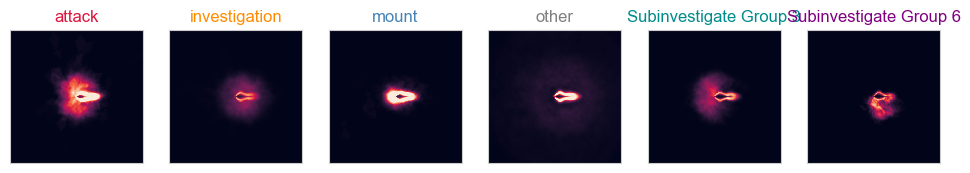

In [5]:
c_range = [0, 20]
rows = 1
cols = len(action_types)
cmap = ['crimson', 'darkorange', 'steelblue', 'gray', 'darkcyan', 'purple']
fig, ax = plt.subplots(rows, cols, figsize=(12, 3))
for col in range(cols):
    ax[col].set_title(action_types[col], color=cmap[col])
    ax[col].imshow(np.nanmean(motion_energy_by_behavior[col], axis=0)[50:450, 50:450],
                        vmin=c_range[0], vmax=c_range[1])
    ax[col].set_xticklabels('')
    ax[col].set_yticklabels('')
    ax[col].grid(False)